In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp

import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
penguins = seaborn.load_dataset('penguins')

print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


# Q2.1.1 Data Preprocessing

In [3]:
penguins_processed = penguins.dropna()

X = penguins_processed.drop('species', axis=1).to_numpy()
y = penguins_processed['species'].to_numpy()

In [4]:
features1 = sorted(list(set(X[:, 0])))
f12i = {f: i for i, f in enumerate(features1)}
i2f1 = {i: f for i, f in enumerate(features1)}

X[:, 0] = np.array([f12i[f] for f in X[:, 0]])

In [5]:
features6 = sorted(list(set(X[:, 5])))
f62i = {f: i for i, f in enumerate(features6)}

i2f6 = {i: f for i, f in enumerate(features6)}
X[:, 5] = np.array([f62i[f] for f in X[:, 5]])

In [6]:
class_names = sorted(list(set(y)))
cname2i = {name: i for i, name in enumerate(class_names)}
y = np.array([cname2i[n] for n in y])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
answer = f"""
Q2.1.1 Data Preprocessing:
Number of data points in the whole dataset originally: {len(penguins)}
Number of data points in the whole dataset after deleting incomplete data: {len(penguins_processed)}
Number of data points in the training set after splitting: {len(X_train)}
Number of data points in the test set after splitting: {len(X_test)}
""".strip()

print(answer)

Q2.1.1 Data Preprocessing:
Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset after deleting incomplete data: 333
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


# Q2.1.2 Data Statistics

In [9]:
feature_names = penguins.columns[1:]

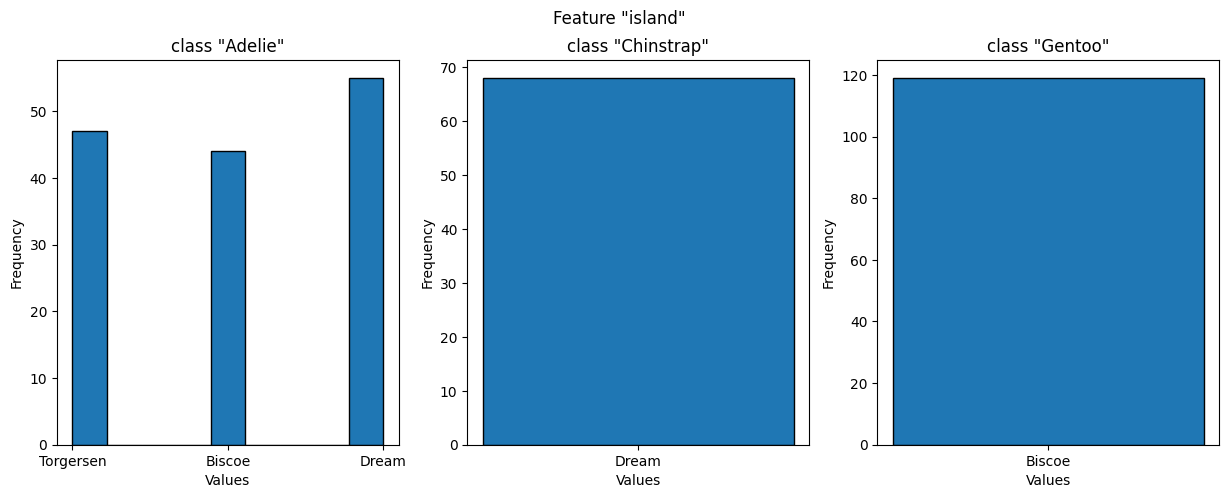

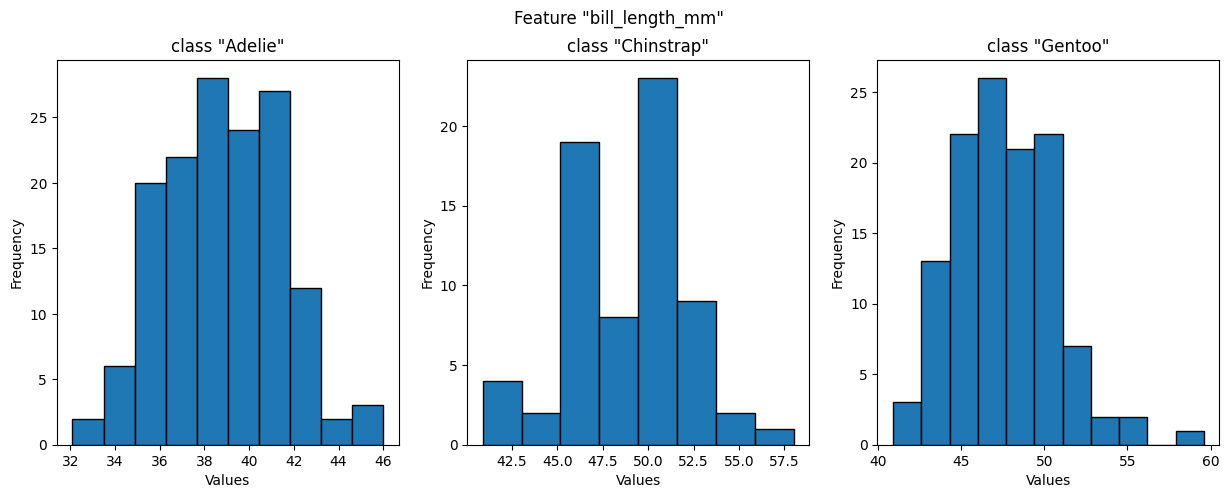

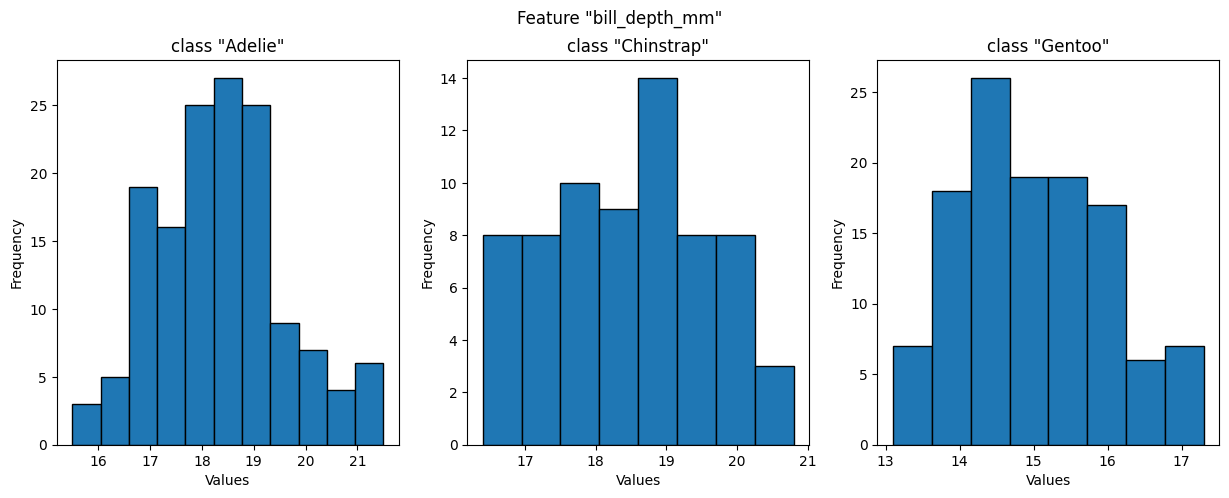

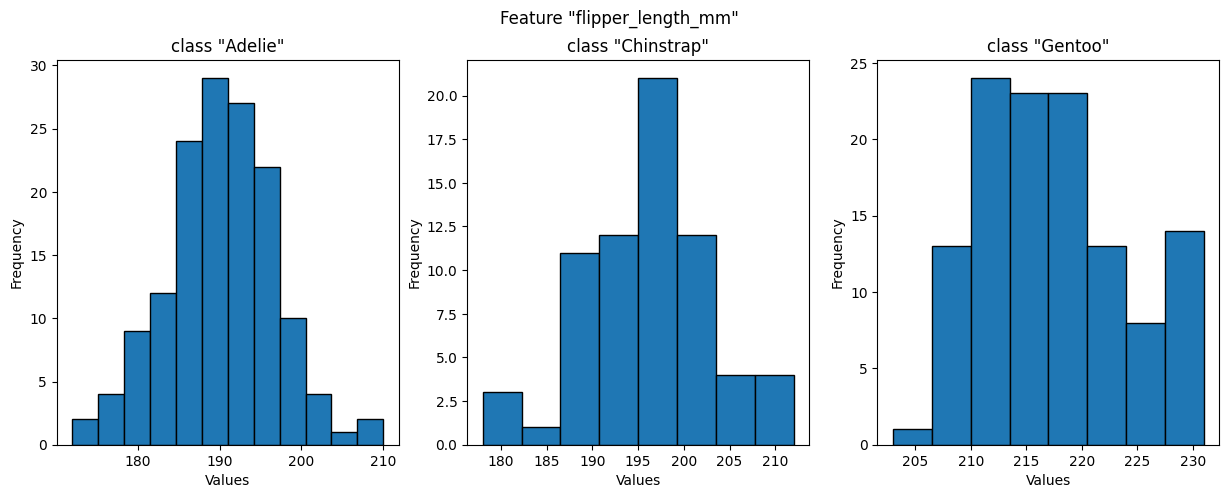

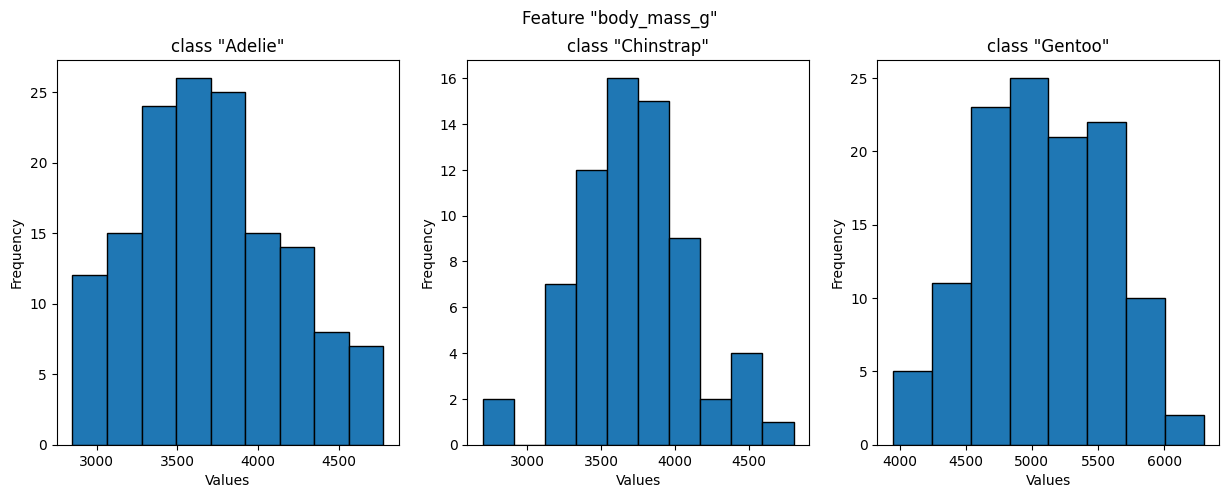

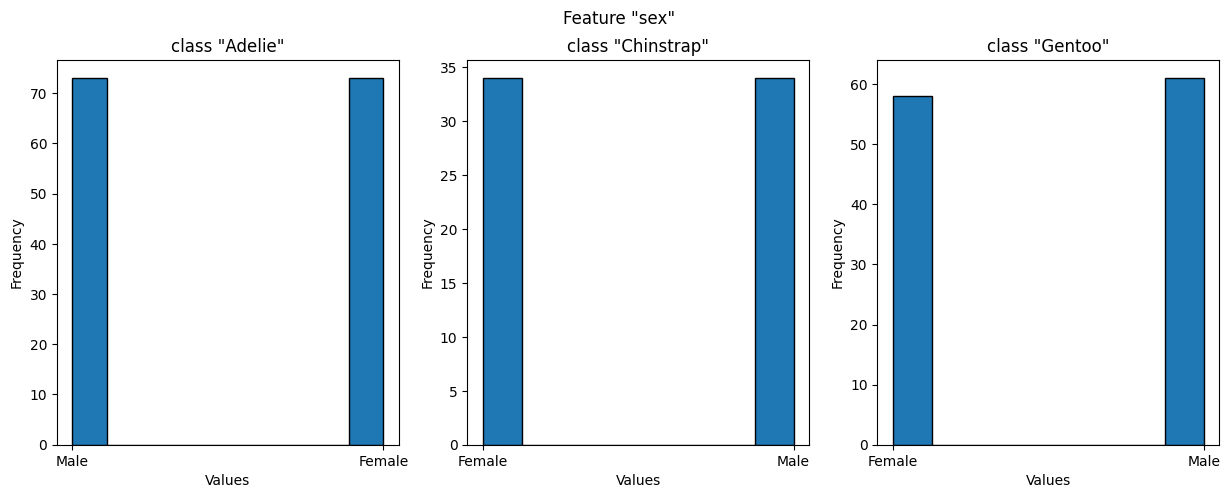

In [10]:
for j, feature_name in enumerate(feature_names):
    plt.subplots(1, len(class_names), figsize=(15, 5))
    plt.suptitle(f'Feature "{feature_name}"')

    for i, class_name in enumerate(class_names, start=1):
        axes = plt.subplot(1, len(class_names), i)

        mask = (y == cname2i[class_name])
        values = X[mask, j]
        if j == 0:
            values = np.array([i2f1[v] for v in values])
        if j == 5:
            values = np.array([i2f6[v] for v in values])
            
        plt.hist(values, bins='auto', edgecolor='black')
        axes.set_title(f'class "{class_name}"')

        plt.xlabel('Values')
        plt.ylabel('Frequency')

    plt.show()

# Q2.1.3 Decision Tree

In [11]:
initial_answer_template = """
Q2.1.3 Decision Tree:
""".strip()


attempt_answer_template = """
training accuracy: {trainining_accuracy}, test accuracy: {test_accuracy}
""".strip()

def get_answer_with_decision_tree(**kwargs):
    clf = DecisionTreeClassifier(random_state=42, **kwargs)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    trainining_accuracy = accuracy_score(y_train, y_pred)

    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    return clf, attempt_answer_template.format(trainining_accuracy=trainining_accuracy, test_accuracy=test_accuracy)

Q2.1.3 Decision Tree:
1. Results with maximum depth as 1:
training accuracy: 0.7725321888412017, test accuracy: 0.82

2. Results with maximum depth as 3:
training accuracy: 0.9742489270386266, test accuracy: 0.98

3. Results with maximum depth as 6:
training accuracy: 1.0, test accuracy: 0.98



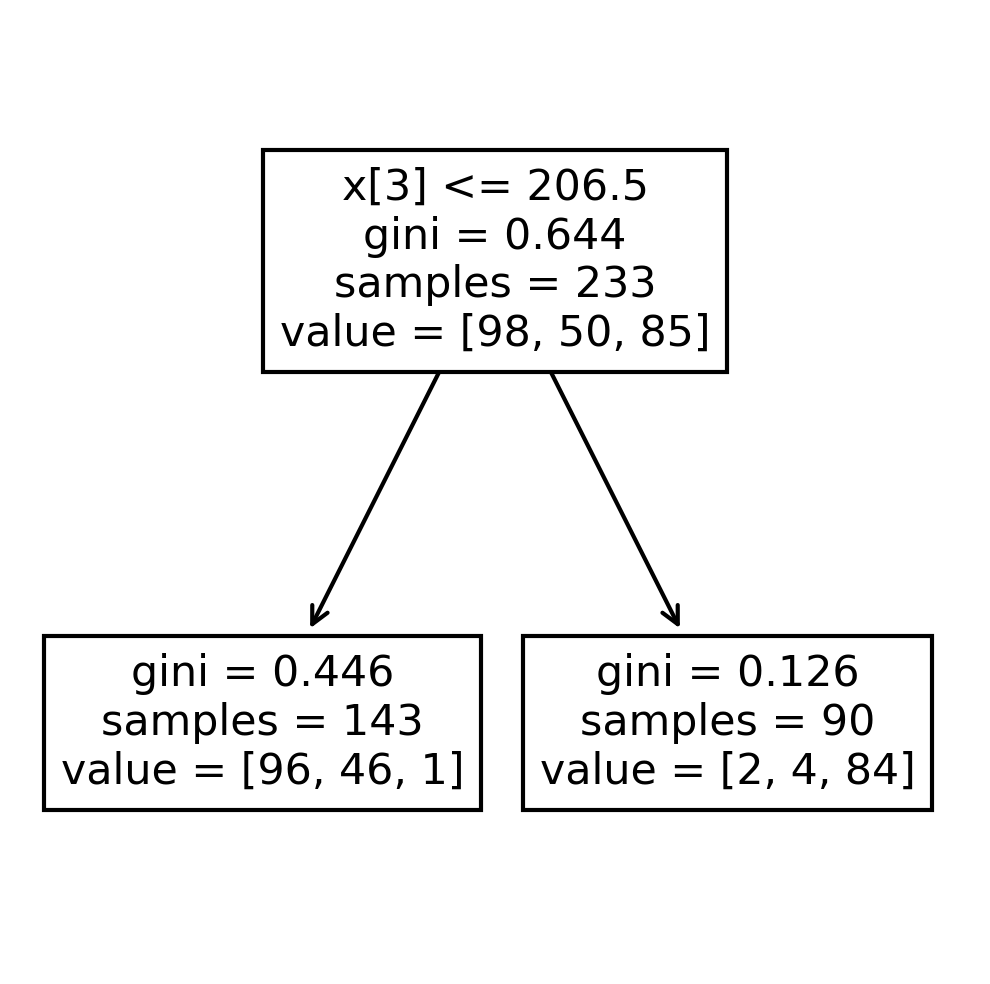

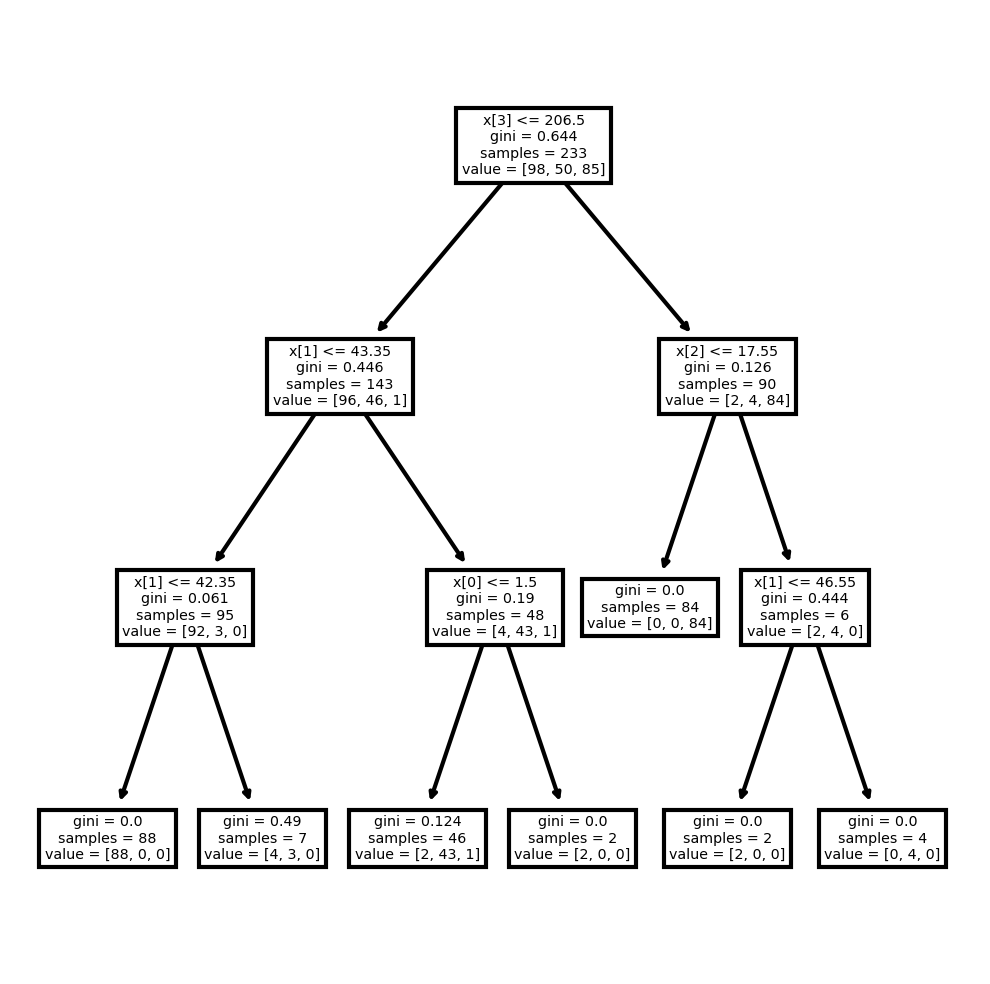

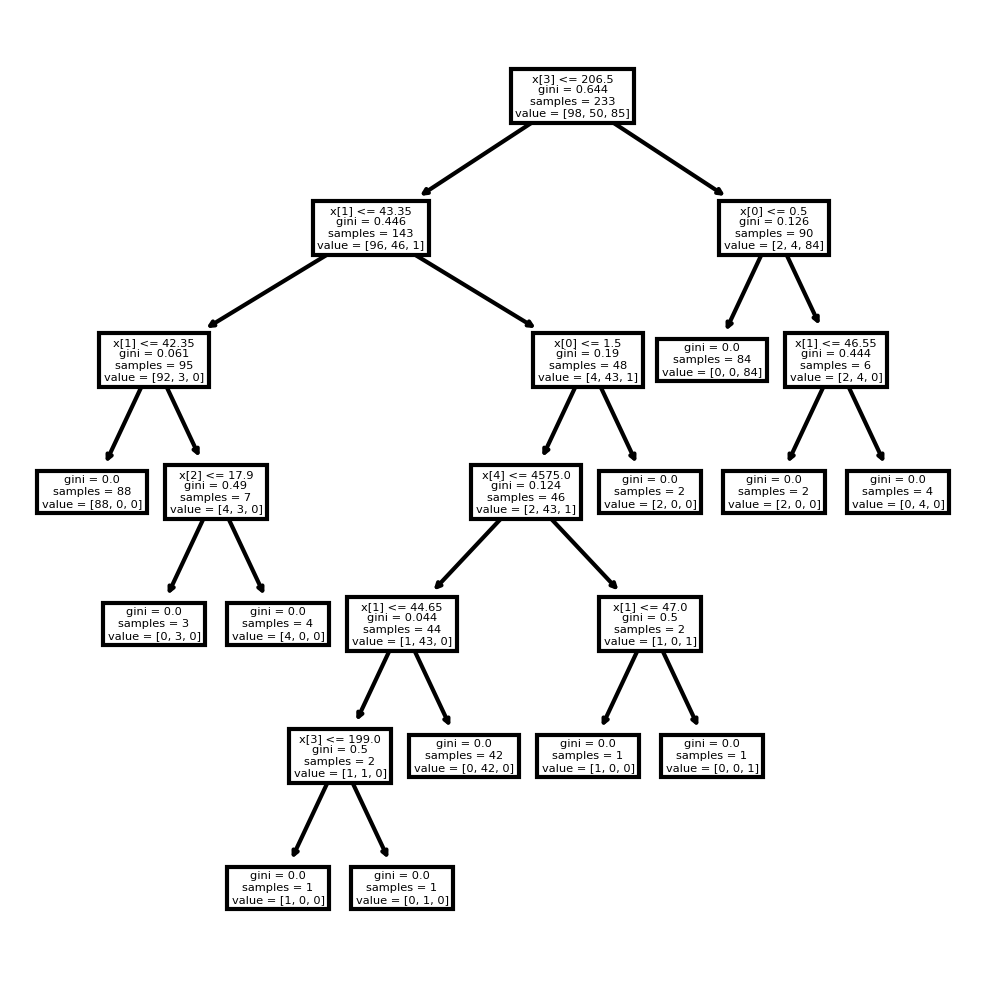

In [12]:
d_list = [1, 3, 6]

print(initial_answer_template)
for i, d in enumerate(d_list, start=1):
    print(f"{i}. Results with maximum depth as {d}:")
    clf, attempt_answer = get_answer_with_decision_tree(max_depth=d)
    print(attempt_answer, end='\n\n')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
    tree.plot_tree(clf, ax=ax)

4. Results with least node size as 5:
training accuracy: 0.9699570815450643, test accuracy: 0.98

5. Results with least node size as 20:
training accuracy: 0.9399141630901288, test accuracy: 0.97

6. Results with least node size as 50:
training accuracy: 0.9356223175965666, test accuracy: 0.95



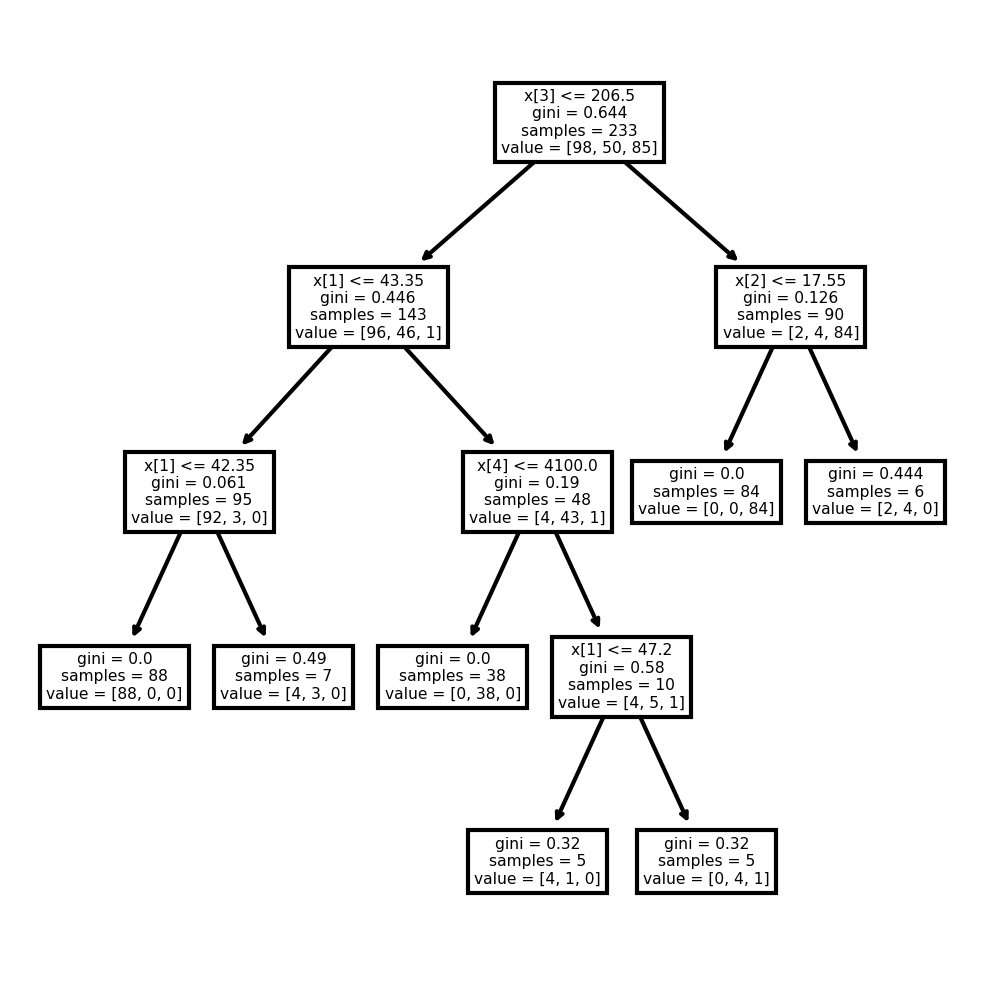

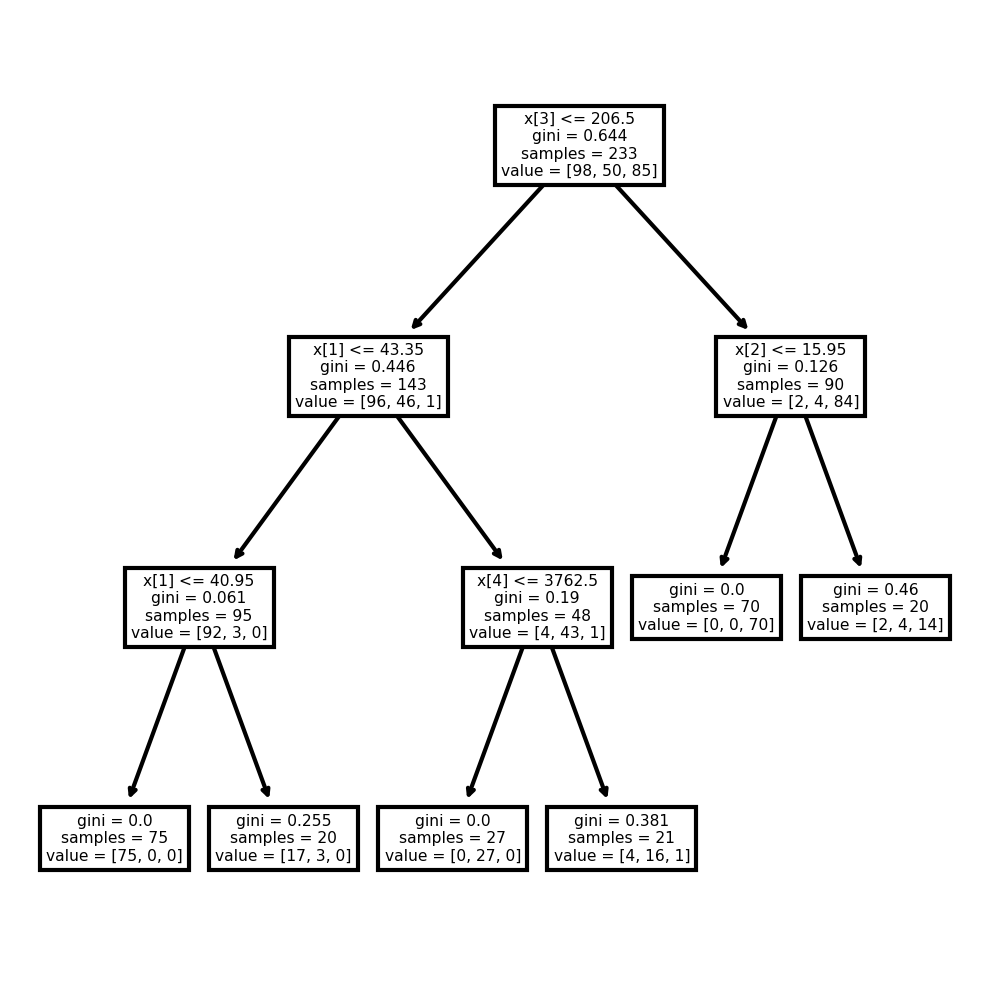

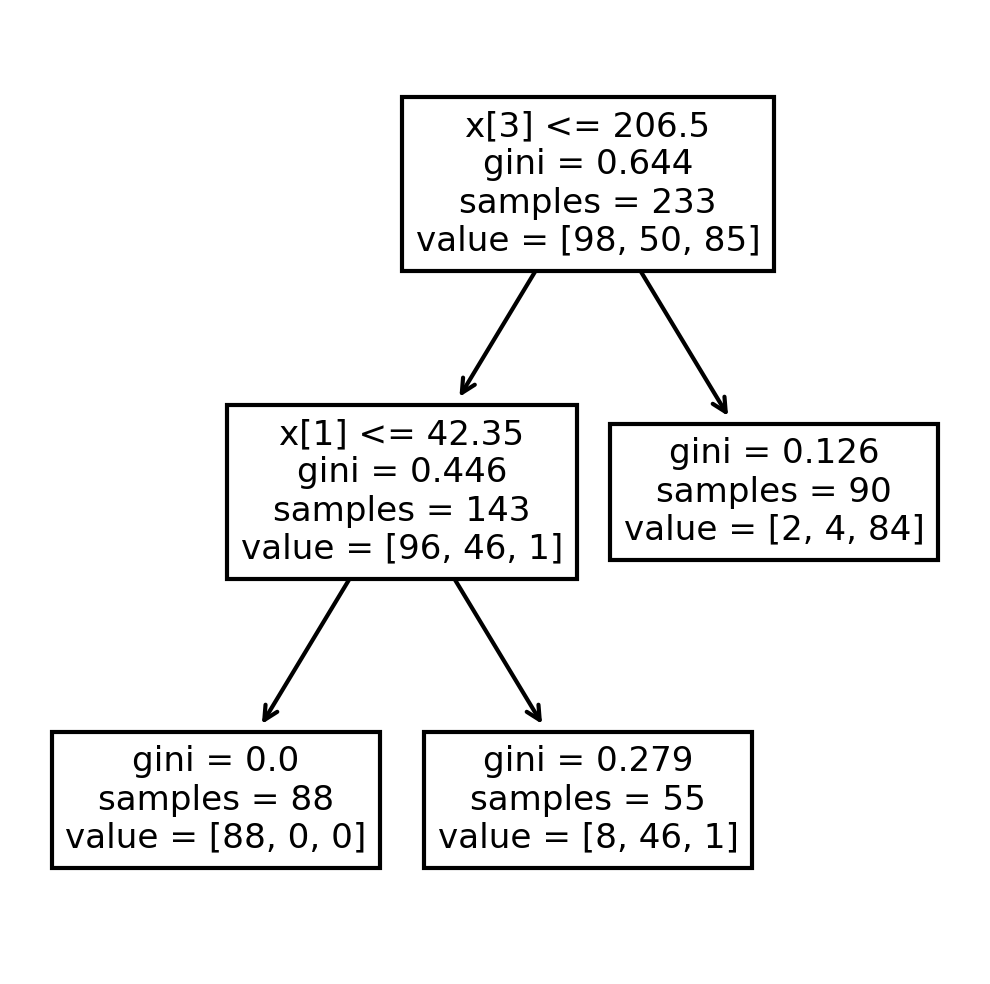

In [13]:
n_list = [5, 20, 50]

for i, n in enumerate(n_list, start=4):
    print(f"{i}. Results with least node size as {n}:")
    clf, attempt_answer = get_answer_with_decision_tree(min_samples_leaf=n)
    print(attempt_answer, end='\n\n')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
    tree.plot_tree(clf, ax=ax)

# Q2.1.4 Bagging of Trees

In [14]:
initial_answer_template = """
Q2.1.4 Bagging of Trees:
""".strip()


attempt_answer_template = """
training accuracy: {trainining_accuracy}, test accuracy: {test_accuracy}
""".strip()

def get_answer_with_bagging_of_trees(max_depth=None, **kwargs):
    base_clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf = BaggingClassifier(base_estimator=base_clf, random_state=42, **kwargs)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    trainining_accuracy = accuracy_score(y_train, y_pred)

    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    return attempt_answer_template.format(trainining_accuracy=trainining_accuracy, test_accuracy=test_accuracy)

In [15]:
d_list = [1, 3, 6]

print(initial_answer_template)
for i, d in enumerate(d_list, start=1):
    print(f"{i}. Results with maximum depth as {d}:")
    attempt_answer = get_answer_with_bagging_of_trees(max_depth=d)
    print(attempt_answer, end='\n\n')

n_list = [1, 2, 5]
for i, n in enumerate(n_list, start=4):
    print(f"{i}. Results with number of trees as {n}:")
    attempt_answer = get_answer_with_bagging_of_trees(n_estimators=n)
    print(attempt_answer, end='\n\n')

Q2.1.4 Bagging of Trees:
1. Results with maximum depth as 1:
training accuracy: 0.7682403433476395, test accuracy: 0.79

2. Results with maximum depth as 3:
training accuracy: 0.9785407725321889, test accuracy: 0.98

3. Results with maximum depth as 6:
training accuracy: 1.0, test accuracy: 0.99

4. Results with number of trees as 1:
training accuracy: 0.9871244635193133, test accuracy: 0.99

5. Results with number of trees as 2:
training accuracy: 1.0, test accuracy: 0.99

6. Results with number of trees as 5:
training accuracy: 1.0, test accuracy: 0.99



/Users/oak/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/oak/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/oak/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/oak/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/oak/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version

# Q2.1.5 Random Forests

In [16]:
initial_answer_template = """
Q2.1.5 Random Forests:
""".strip()


attempt_answer_template = """
training accuracy: {trainining_accuracy}, test accuracy: {test_accuracy}
""".strip()

def get_answer_with_random_forest(**kwargs):
    clf = RandomForestClassifier(random_state=42, **kwargs)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    trainining_accuracy = accuracy_score(y_train, y_pred)

    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    return attempt_answer_template.format(trainining_accuracy=trainining_accuracy, test_accuracy=test_accuracy)

In [17]:
d_list = [1, 3, 6]

print(initial_answer_template)
for i, d in enumerate(d_list, start=1):
    print(f"{i}. Results with maximum depth as {d}:")
    attempt_answer = get_answer_with_random_forest(max_depth=d)
    print(attempt_answer, end='\n\n')

n_list = [2, 5, 10]
for i, n in enumerate(n_list, start=4):
    print(f"{i}. Results with number of trees as {n}:")
    attempt_answer = get_answer_with_random_forest(n_estimators=n)
    print(attempt_answer, end='\n\n')

Q2.1.5 Random Forests:
1. Results with maximum depth as 1:
training accuracy: 0.7811158798283262, test accuracy: 0.82

2. Results with maximum depth as 3:
training accuracy: 0.9742489270386266, test accuracy: 0.98

3. Results with maximum depth as 6:
training accuracy: 1.0, test accuracy: 0.99

4. Results with number of trees as 2:
training accuracy: 0.9828326180257511, test accuracy: 0.94

5. Results with number of trees as 5:
training accuracy: 0.9957081545064378, test accuracy: 0.99

6. Results with number of trees as 10:
training accuracy: 1.0, test accuracy: 0.99



# Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests

In [18]:

def get_bias_and_variance_random_forest(**kwargs):
    clf = RandomForestClassifier(random_state=42, **kwargs)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=42)

    return avg_bias, avg_var

In [21]:
n_tree_list = range(10, 510, 10)

bias2_list = []
variance_list = []
for n in n_tree_list:
    avg_bias, avg_var = get_bias_and_variance_random_forest(n_estimators=n)
    bias2_list.append(avg_bias ** 2)
    variance_list.append(avg_var)

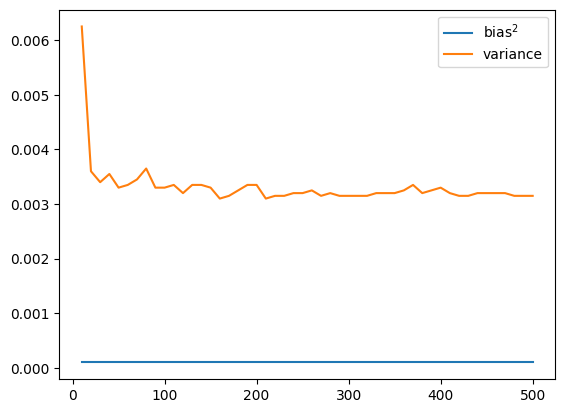

In [22]:
plt.plot(n_tree_list, bias2_list, label='bias$^2$')
plt.plot(n_tree_list, variance_list, label='variance')
plt.legend()